In [144]:
#Import libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [145]:
reviews_df=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [146]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [147]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [148]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [149]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## Exploratory Data Analysis

<AxesSubplot:>

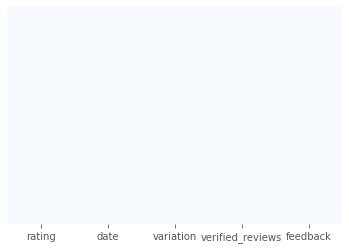

In [150]:
#check for null values
sns.heatmap(reviews_df.isna(),yticklabels=False,cbar=False,cmap='Blues')

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>]], dtype=object)

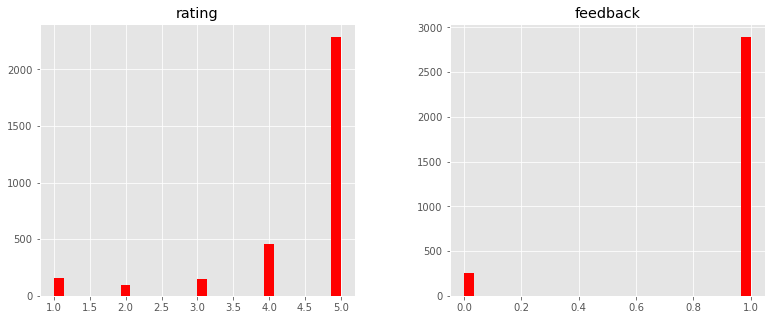

In [151]:
#plot histogramms
reviews_df.hist(bins=30,figsize=(13,5),color='red')

In [152]:
# Let's get the length of the messages
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:ylabel='Frequency'>

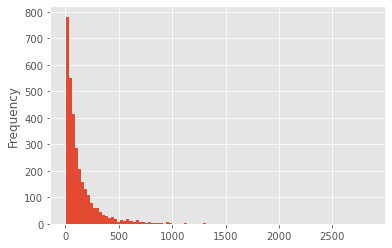

In [153]:
reviews_df['length'].plot(bins=100, kind='hist') 

In [154]:
reviews_df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [155]:
#get the positive reviews
positive = reviews_df[reviews_df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [156]:
#get the negative reviews
negative = reviews_df[reviews_df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='feedback', ylabel='count'>

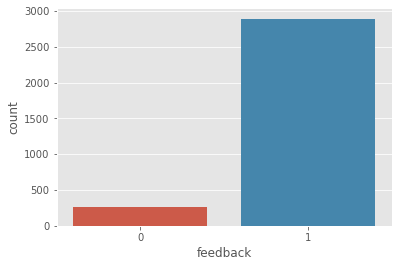

In [157]:
#visualize target variable-imbalanced dataset
sns.countplot(reviews_df['feedback'], label = "Count") 

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating', ylabel='count'>

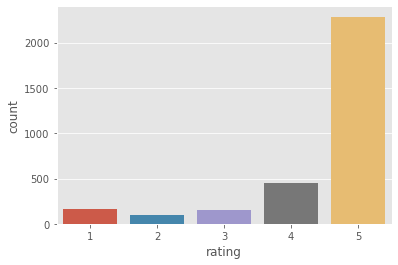

In [158]:
#visualize ratings 
sns.countplot(reviews_df['rating'], label = "Count") 

### Wordcloud visualization

In [159]:
#how to do the wordcloud-first make the reviews one string
sentences = reviews_df['verified_reviews'].tolist()
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

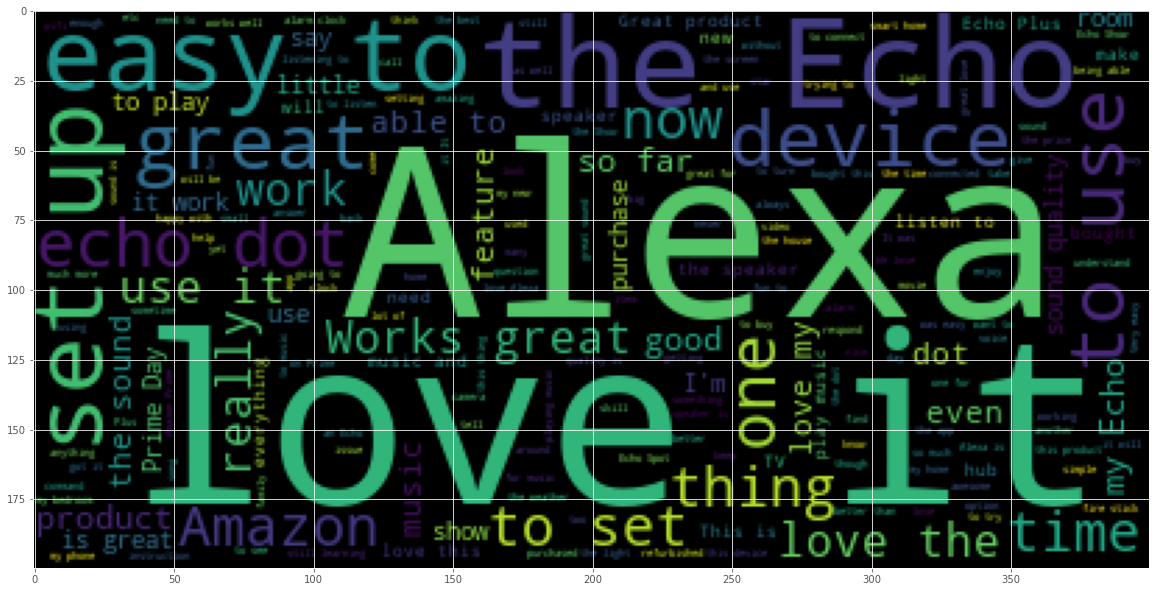

In [160]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

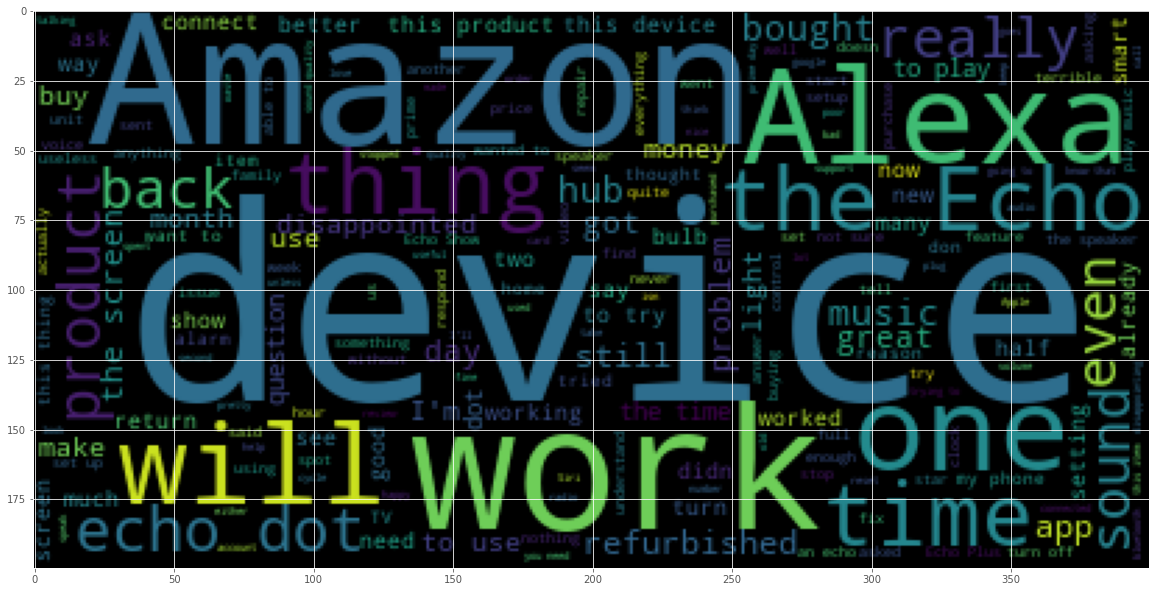

In [161]:
#how to do the wordcloud-first make the reviews one string
negative_list = negative['verified_reviews'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

### Data Cleaning

In [162]:
# Let's drop unwanted columns
reviews_df = reviews_df.drop(['date', 'rating', 'length'],axis=1)


In [163]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)
# Avoid Dummy Variable trap which occurs when one variable can be predicted from the other.

In [164]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [165]:
# then drop the column
reviews_df.drop(['variation'], axis=1, inplace=True)

In [166]:
# Now let's add the encoded column again
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)

In [167]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Remove Punctuation and Stopwords

In [168]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
import string
from nltk.stem.porter import *

In [169]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords, (3) remove short words (2 characters and less)
# (4) perform stemming
def message_cleaning(message):
    stemmer = PorterStemmer()
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [stemmer.stem(word) for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english') and len(word)>2]
    return Test_punc_removed_join_clean

In [170]:
#test the function
verified_reviews_clean=reviews_df['verified_reviews'].apply(message_cleaning)
verified_reviews_clean

0                                            [love, echo]
1                                                  [love]
2       [sometim, play, game, answer, question, correc...
3       [lot, fun, thing, old, learn, dinosaur, contro...
4                                                 [music]
                              ...                        
3145                       [perfect, kid, adult, everyon]
3146    [listen, music, search, locat, check, time, lo...
3147    [love, thing, run, entir, home, light, thermos...
3148    [complaint, sound, qualiti, isnt, great, mostl...
3149                                               [good]
Name: verified_reviews, Length: 3150, dtype: object

### Count Vectorization (TOKENIZATION)

In [171]:
#perform Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [172]:
#see vectriazation result
print(vectorizer.get_feature_names())


['072318', '100', '1000', '100x', '1010', '1030pm', '1100sf', '1220', '129', '12am', '150', '1964', '1990', '1990’', '1gb', '1rst', '1st', '200', '2000', '2017', '2030', '229', '2448', '247', '24ghz', '299', '2999', '2nd', '2or', '2origin', '2packag', '300', '30so', '334', '342nd', '3434', '34a34', '34alexa', '34alexa34', '34card34', '34certifi', '34computer34', '34cycl', '34cycle34', '34dot34', '34drop', '34first', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34hub', '34i', '34im', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34never', '34outlet34', '34personal34', '34philip', '34play', '34second', '34she34', '34show', '34skills34', '34smart', '34smart34', '34sorri', '34spying34', '34tell', '34the', '34thi', '34thick34', '34thing', '34thong', '34tri', '34troubl', '34turn', '34visual34', '34wake34m', '34warehouse34', '34what', '360', '399', '3999', '3dot', '3rd', '3x', '40000', '4am', '4th', '5am”', '5ghz', '5th', '600', '6

In [173]:
reviews_countvectorizer.shape

(3150, 3297)

In [174]:
# first let's drop the column and create the vectorized array version to dataframe
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())


In [175]:
# Now let's concatenate them together
reviews_df = pd.concat([reviews_df, reviews], axis=1)


In [176]:
#Our new df
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,3287,3288,3289,3290,3291,3292,3293,3294,3295,3296
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
# Let's drop the target column
X = reviews_df.drop(['feedback'],axis=1)

In [178]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,3287,3288,3289,3290,3291,3292,3293,3294,3295,3296
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
#store here our target variable
y = reviews_df['feedback']

In [180]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [181]:
X.shape

(3150, 3312)

In [182]:
y.shape

(3150,)

In [183]:
#split into train-test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [184]:
#train a Naive-Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

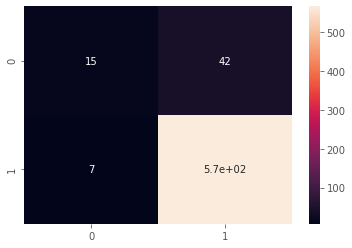

In [185]:
#predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [186]:
print('Model\'s accuracy: {}%'.format(round(accuracy_score(y_test, y_predict_test),2)*100))

Model's accuracy: 92.0%


In [187]:
#What about recall
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.26      0.38        57
           1       0.93      0.99      0.96       573

    accuracy                           0.92       630
   macro avg       0.81      0.63      0.67       630
weighted avg       0.91      0.92      0.91       630



In [188]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [189]:
print('Model\'s accuracy: {}%'.format(round(accuracy_score(y_test, y_pred),2)*100))

Model's accuracy: 94.0%


<AxesSubplot:>

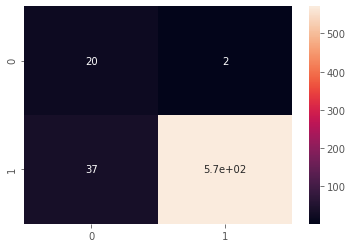

In [190]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.35      0.51        57
           1       0.94      1.00      0.97       573

    accuracy                           0.94       630
   macro avg       0.92      0.67      0.74       630
weighted avg       0.94      0.94      0.93       630



### NLP with Neural Nets

In [192]:
## Neural Nets approach-different Pre-processing is needed

In [193]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [115]:
#get again the vanilla dataset
reviews_df_nn=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [116]:
#apply cleaning function and store it in dataframe
reviews_only=pd.DataFrame(reviews_df_nn['verified_reviews'].apply(message_cleaning))

In [117]:
reviews_only['verified_reviews_joined']=reviews_only['verified_reviews'].apply(lambda x: " ".join(x))

In [118]:
reviews_only

,verified_reviews,verified_reviews_joined
0,"[love, echo]",love echo
1,[love],love
2,"[sometim, play, game, answer, question, correc...",sometim play game answer question correctli al...
3,"[lot, fun, thing, old, learn, dinosaur, contro...",lot fun thing old learn dinosaur control light...
4,[music],music
...,...,...
3145,"[perfect, kid, adult, everyon]",perfect kid adult everyon
3146,"[listen, music, search, locat, check, time, lo...",listen music search locat check time look weat...
3147,"[love, thing, run, entir, home, light, thermos...",love thing run entir home light thermostat fro...
3148,"[complaint, sound, qualiti, isnt, great, mostl...",complaint sound qualiti isnt great mostli use ...


In [119]:
# Obtain the total words present in the dataset
list_of_words = []
for i in reviews_only['verified_reviews']:
    for j in i:
        list_of_words.append(j)

In [120]:
# Obtain the total number of unique words
total_words=len(list(set(list_of_words)))
total_words

3297

In [121]:
maxlen = -1
for doc in reviews_only['verified_reviews_joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 262


In [122]:
# split the data into test and train  
X = reviews_only['verified_reviews']
y = reviews_df_nn['feedback']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [123]:
X_train.shape

(2520,)

In [124]:
y_test.shape

(630,)

In [125]:
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
X_train = tokenizer.texts_to_sequences(X_train)

# Testing data
X_test = tokenizer.texts_to_sequences(X_test)


In [126]:
# Add padding to training and testing to make all vectors the same size
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [127]:
# create the model
embedding_vector_length = 64
model = Sequential()
model.add(Embedding(total_words, embedding_vector_length, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
# Bi-Directional RNN and LSTM
model.add(LSTM(256,return_sequences=True))
model.add(LSTM(256,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 262, 64)           211008    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 262, 32)           6176      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 131, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 131, 256)          295936    
_________________________________________________________________
lstm_5 (LSTM)                (None, 131, 256)          525312    
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [128]:
# train the model
history=model.fit(X_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 15)


Train on 2016 samples, validate on 504 samples
Epoch 1/15
2016/2016 [==============================] - 53s 26ms/step - loss: 0.3435 - accuracy: 0.9102 - val_loss: 0.2533 - val_accuracy: 0.9385
Epoch 2/15
2016/2016 [==============================] - 53s 26ms/step - loss: 0.3014 - accuracy: 0.9107 - val_loss: 0.2337 - val_accuracy: 0.9385
Epoch 3/15
2016/2016 [==============================] - 57s 28ms/step - loss: 0.2876 - accuracy: 0.9102 - val_loss: 0.2065 - val_accuracy: 0.9405
Epoch 4/15
2016/2016 [==============================] - 56s 28ms/step - loss: 0.2116 - accuracy: 0.9380 - val_loss: 0.1936 - val_accuracy: 0.9464
Epoch 5/15
2016/2016 [==============================] - 54s 27ms/step - loss: 0.1280 - accuracy: 0.9588 - val_loss: 0.1793 - val_accuracy: 0.9504
Epoch 6/15
2016/2016 [==============================] - 56s 28ms/step - loss: 0.0677 - accuracy: 0.9752 - val_loss: 0.2293 - val_accuracy: 0.9464
Epoch 7/15
2016/2016 [==============================] - 55s 27ms/step - loss

In [129]:
# make prediction
pred = model.predict_classes(X_test)

In [130]:
# acuracy score
print('Model\'s accuracy: {}%'.format(round(accuracy_score(pred, y_test),2)*100))

Model's accuracy: 95.0%


<AxesSubplot:>

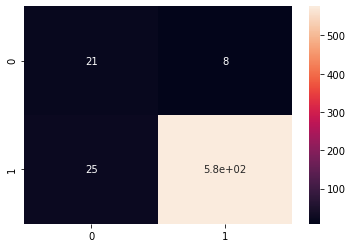

In [131]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot = True)

In [132]:
# Plot the classification report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.46      0.72      0.56        29
           1       0.99      0.96      0.97       601

    accuracy                           0.95       630
   macro avg       0.72      0.84      0.77       630
weighted avg       0.96      0.95      0.95       630



In [133]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

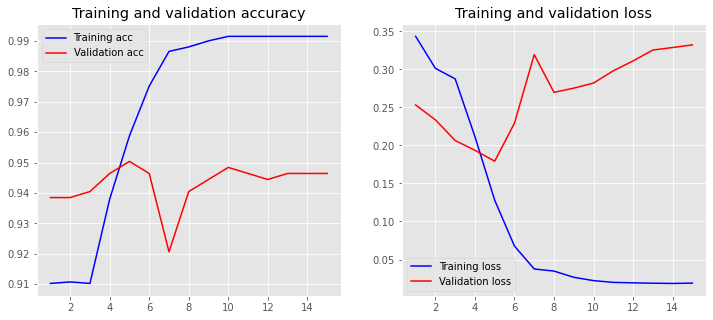

In [134]:
plot_history(history)